# Mean-Field Quantum Landau-Lifshitz-Bloch simulations

Mean-Field Quantum Landau-Lifshitz-Bloch simulations

## Setup

Do all necessary imports and settings.

In [189]:
%load_ext autoreload
%autoreload 2

import udkm1Dsim as ud
u = ud.u  # import the pint unit registry from udkm1Dsim
import scipy.constants as constants
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
u.setup_matplotlib()  # use matplotlib with pint units

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Structure

 to the [structure-example](structure.ipynb) for more details.

In [190]:
Co = ud.Atom('Co', mag_amplitude=1, mag_gamma=0*u.deg, mag_phi=0*u.deg)
Ni = ud.Atom('Ni', mag_amplitude=1, mag_gamma=90*u.deg, mag_phi=0*u.deg)
Fe = ud.Atom('Fe', mag_amplitude=1, mag_gamma=0*u.deg, mag_phi=90*u.deg)
Si = ud.Atom('Si')

In [250]:
prop_Ni = {}
prop_Ni['heat_capacity'] = ['0.1*T',
                              532*u.J/u.kg/u.K,
                             ]
prop_Ni['therm_cond'] = [20*u.W/(u.m*u.K),
                           80*u.W/(u.m*u.K),]

prop_Ni['aniso_exponents'] = [1, 2, 3]

R = 25.3/1e-12
Tc = 1388
g = 4.0e18

prop_Ni['sub_system_coupling'] = \
    ['-{:f}*(T_0-T_1)'.format(g),
     '{:f}*(T_0-T_1)'.format(g)
    ]
prop_Ni['lin_therm_exp'] = [0, 11.8e-6]
prop_Ni['sound_vel'] = 4.910*u.nm/u.ps
prop_Ni['opt_ref_index'] = 2.9174+3.3545j

# LLB stuff
prop_Ni['eff_spin'] = 0.5
prop_Ni['curie_temp'] = 630*u.K
prop_Ni['lamda'] = 0.005
prop_Ni['mag_moment'] = 0.393*u.bohr_magneton
prop_Ni['aniso_exponent'] = 3
prop_Ni['anisotropy'] = [0.45e6, 0.45e6, 0.45e6]*u.J/u.m**3
prop_Ni['exch_stiffness'] = [0.1e-15, 1e-15, 0.01e-15]*u.J/u.m
prop_Ni['mag_saturation'] = 500e3*u.J/u.T/u.m**3

layer_Ni = ud.AmorphousLayer('Ni', 'Ni amorphous', thickness=1*u.nm,
                             density=7000*u.kg/u.m**3, atom=Ni, **prop_Ni)

Number of subsystems changed from 1 to 2.


In [232]:
layer_Ni.aniso_exponent

3

In [251]:
prop_Co = {}
prop_Co['heat_capacity'] = ['0.1*T',
                              332*u.J/u.kg/u.K,
                             ]
prop_Co['therm_cond'] = [20*u.W/(u.m*u.K),
                           80*u.W/(u.m*u.K),]


R = 25.3/1e-12
Tc = 1388
g = 5.0e18

prop_Co['sub_system_coupling'] = \
    ['-{:f}*(T_0-T_1)'.format(g),
     '{:f}*(T_0-T_1)'.format(g)
    ]
prop_Co['lin_therm_exp'] = [0, 11.8e-6]
prop_Co['sound_vel'] = 4.910*u.nm/u.ps
prop_Co['opt_ref_index'] = 2.9174+3.3545j

# LLB stuff
prop_Co['eff_spin'] = 1e6
prop_Co['curie_temp'] = 1480*u.K
prop_Co['lamda'] = 0.005
prop_Co['mag_moment'] = 0.393*u.bohr_magneton
prop_Co['aniso_exponent'] = 3
prop_Co['anisotropy'] = [0.45e6, 0.45e6, 0.45e6]*u.J/u.m**3
prop_Co['exch_stiffness'] = [0.2e-15, 2e-15, 0.02e-15]*u.J/u.m
prop_Co['mag_saturation'] = 1400e3*u.J/u.T/u.m**3

layer_Co = ud.AmorphousLayer('Co', 'Co amorphous', thickness=1*u.nm,
                             density=7000*u.kg/u.m**3, atom=Co, **prop_Co)

Number of subsystems changed from 1 to 2.


In [194]:
print(layer_Co)

Amorphous layer with the following properties

============================  ==========================================
                   parameter  value
============================  ==========================================
                          id  Co
                        name  Co amorphous
                   thickness  1.0 nm
                        area  0.01 nm²
                      volume  0.01 nm³
                        mass  7×10⁻²⁶ kg
          mass per unit area  7×10⁻²⁶ kg
                     density  7×10³ kg/m³
                   roughness  0.0 nm
         Debye Waller Factor  0 m²
              sound velocity  4.91×10³ m/s
             spring constant  [1.6875670000000007] kg/s²
              phonon damping  0.0 kg/s
             opt. pen. depth  0.0 nm
       opt. refractive index  (2.9174+3.3545j)
      opt. ref. index/strain  0
            thermal conduct.  20.0 W/(m K)
                              80.0 W/(m K)
    linear thermal expansion  0
           

In [252]:
prop_Fe = {}
prop_Fe['heat_capacity'] = ['0.1*T',
                              732*u.J/u.kg/u.K,
                             ]
prop_Fe['therm_cond'] = [20*u.W/(u.m*u.K),
                           80*u.W/(u.m*u.K),]

prop_Fe['aniso_exponents'] = [1, 2, 3]

R = 25.3/1e-12
Tc = 1388
g = 6.0e18

prop_Fe['sub_system_coupling'] = \
    ['-{:f}*(T_0-T_1)'.format(g),
     '{:f}*(T_0-T_1)'.format(g)
    ]
prop_Fe['lin_therm_exp'] = [0, 11.8e-6]
prop_Fe['sound_vel'] = 4.910*u.nm/u.ps
prop_Fe['opt_ref_index'] = 2.9174+3.3545j

# LLB stuff
prop_Fe['eff_spin'] = 2
prop_Fe['curie_temp'] = 1024*u.K
prop_Fe['lamda'] = 0.005
prop_Fe['mag_moment'] = 2.2*u.bohr_magneton
prop_Fe['aniso_exponent'] = 3
prop_Fe['anisotropy'] = [0.45e6, 0.45e6, 0.45e6]*u.J/u.m**3
prop_Fe['exch_stiffness'] = [0.3e-15, 3e-17, 0.03e-15]*u.J/u.m
prop_Fe['mag_saturation'] = 200e3*u.J/u.T/u.m**3

layer_Fe = ud.AmorphousLayer('Fe', 'Fe amorphous', thickness=1*u.nm,
                             density=7000*u.kg/u.m**3, atom=Fe, **prop_Fe)

Number of subsystems changed from 1 to 2.


In [237]:
prop_Si = {}
prop_Si['heat_capacity'] = [100*u.J/u.kg/u.K, 603*u.J/u.kg/u.K]
prop_Si['therm_cond'] = [0, 100*u.W/(u.m*u.K)]

prop_Si['sub_system_coupling'] = [0, 0]

prop_Si['lin_therm_exp'] = [0, 2.6e-6]
prop_Si['sound_vel'] = 8.433*u.nm/u.ps
prop_Si['opt_ref_index'] = 3.6941+0.0065435j

layer_Si = ud.AmorphousLayer('Si', "Si amorphous", thickness=1*u.nm, density=2336*u.kg/u.m**3,
                             atom=Si, **prop_Si)

Number of subsystems changed from 1 to 2.


In [238]:
S = ud.Structure('CoNi')

S.add_sub_structure(layer_Ni, 10)
S.add_sub_structure(layer_Co, 15)
S.add_sub_structure(layer_Fe, 10)
S.add_sub_structure(layer_Ni, 25)
# S.add_sub_structure(layer_Si, 250)

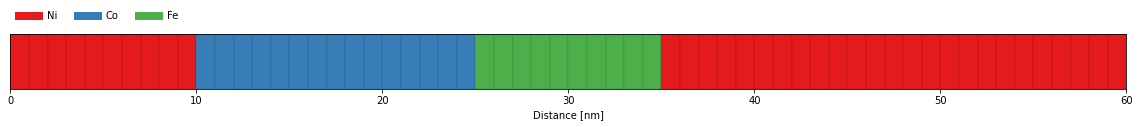

In [239]:
S.visualize()

## Initialize Heat and the Excitation

In [240]:
h = ud.Heat(S, True)

h.save_data = True
h.disp_messages = True
h.cache_dir = './cache'

In [241]:
h.excitation = {'fluence': [5]*u.mJ/u.cm**2,
                'delay_pump':  [0]*u.ps,
                'pulse_width':  [0.15]*u.ps,
                'multilayer_absorption': True,
                'wavelength': 800*u.nm,
                'theta': 45*u.deg}
# temporal and spatial grid
delays = np.r_[-10:10:0.05, 10:100:0.5, 100:2000:1]*u.ps
_, _, distances = S.get_distances_of_layers()

## Calculate Heat Diffusion

In [242]:
# enable heat diffusion
h.heat_diffusion = True
# set the boundary conditions
h.boundary_conditions = {'top_type': 'isolator', 'bottom_type': 'isolator'}
# The resulting temperature profile is calculated in one line:

temp_map, delta_temp = h.get_temp_map(delays, 300)

Surface incidence fluence scaled by factor 0.7071 due to incidence angle theta=45.00 deg
Calculating _heat_diffusion_ for excitation 1:1 ...
Absorption profile is calculated by multilayer formalism.
Total reflectivity of 44.4 % and transmission of 8.6 %.


0it [00:00, ?it/s]

Elapsed time for _heat_diffusion_ with 1 excitation(s): 1.471269 s
Calculating _heat_diffusion_ without excitation...


0it [00:00, ?it/s]

Elapsed time for _heat_diffusion_: 3.418924 s
Elapsed time for _temp_map_: 4.971918 s
_temp_map_ saved to file:
	 temp_map_b1dc83ea46af0a3aaa4bc8758f29be53_8158502122ff31e2cf46d26ef259d4a8.npz


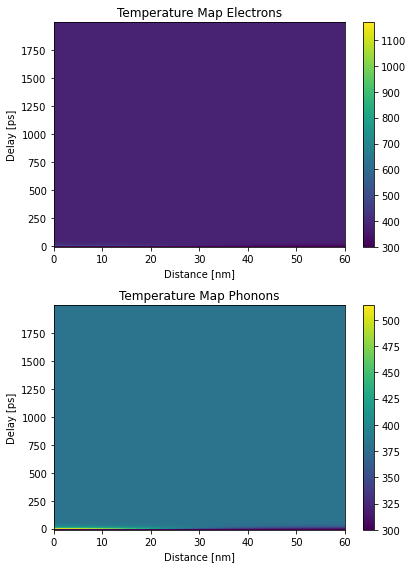

In [243]:
plt.figure(figsize=[6, 8])
plt.subplot(2, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Electrons')

plt.subplot(2, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 1],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Phonons')

plt.tight_layout()
plt.show()

## Magnetization

In [244]:
mag = ud.LLB(S, True)
mag.save_data = False
mag.cache_dir = './cache'
print(mag)

Landau-Lifshitz-Bloch Magnetization Dynamics simulation properties:

Magnetization simulation properties:

This is the current structure for the simulations:

Structure properties:

Name   : CoNi
Thickness : 60.00 nanometer
Roughness : 0.00 nanometer
----
10 times Ni amorphous: 10.00 nanometer
15 times Co amorphous: 15.00 nanometer
10 times Fe amorphous: 10.00 nanometer
25 times Ni amorphous: 25.00 nanometer
----
no substrate


Display properties:

================  =======
       parameter  value
================  =======
    force recalc  True
 cache directory  ./cache
display messages  True
       save data  False
    progress bar  True
================  =======


In [245]:
mag.ode_options['method'] = 'RK45'

In [246]:
init_mag = np.array([1.0, (0.*u.deg).to('rad').magnitude, (0*u.deg).to('rad').magnitude])

magnetization_map = mag.get_magnetization_map(delays, temp_map=temp_map, init_mag=init_mag,
                                              H_ext=np.array([0.1, 0.1, 0.5]))

Calculating _magnetization_map_ ...
Calculating _mean_field_magnetization_map_ ...
Elapsed time for _mean_field_magnetization_map_: 2.319901 s


0it [00:00, ?it/s]

c:\users\loc_schick\general\git\udkm1dsim\udkm1Dsim\simulations\magnetization.py:1080: RuntimeWarning: overflow encountered in sinh
  (eff_spins[under_tc]+1)),


Elapsed time for _LLB_: 6.403980 s
Elapsed time for _magnetization_map_: 6.403980 s


In [247]:
magnetization_map = ud.LLB.convert_polar_to_cartesian(magnetization_map)
# magnetization_map_conv = ud.LLB.convert_cartesian_to_polar(magnetization_map)

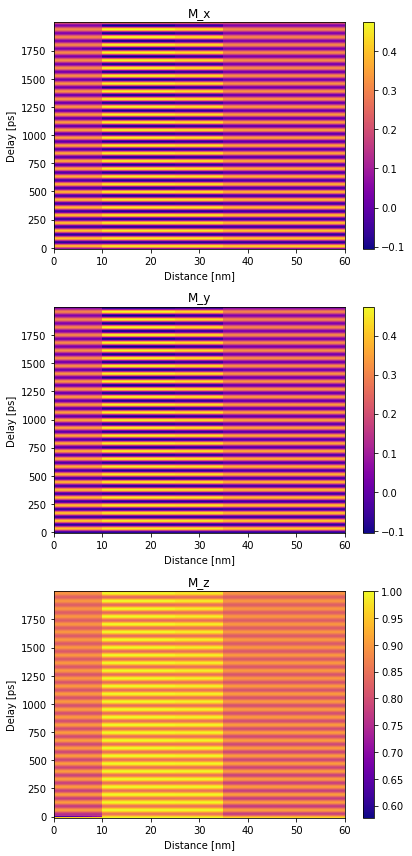

In [248]:
plt.figure(figsize=[6, 12])
plt.subplot(3, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, magnetization_map[:, :, 0],
               shading='auto', cmap='plasma')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('M_x')

plt.subplot(3, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, magnetization_map[:, :, 1],
               shading='auto', cmap='plasma')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('M_y')

plt.subplot(3, 1, 3)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, magnetization_map[:, :, 2],
               shading='auto', cmap='plasma')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('M_z')

plt.tight_layout()
plt.show()

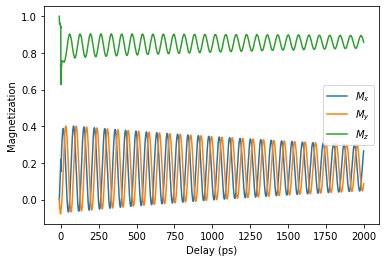

In [249]:
plt.figure()
plt.plot(delays, np.mean(magnetization_map[:, 0:10, 0], axis=1), label=r'$M_x$')
plt.plot(delays, np.mean(magnetization_map[:, 0:10, 1], axis=1), label=r'$M_y$')
plt.plot(delays, np.mean(magnetization_map[:, 0:10, 2], axis=1), label=r'$M_z$')
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.show()

## generate mf-field magnetization map

This function computes the mean field mean magnetization map by solving the self-consistent equation m=B(m, T)
As an output we get an interpolation function of the mean field magnetization at any temperature T<=T_c (this can of course be extended to T>T_c with zeros).

### Brillouin function

In [159]:
import scipy.constants as constants

def Brillouin(m, T, eff_spins, mf_exch_couplings, curie_temps):
    eta = mf_exch_couplings * m / constants.k / T / curie_temps
    c1 = (2 * eff_spins + 1) / (2 * eff_spins)
    c2 = 1 / (2 * eff_spins)
    return c1 / np.tanh(c1 * eta) - c2 / np.tanh(c2 * eta)

In [160]:
eff_spins = S.get_layer_property_vector('eff_spin')
mf_exch_couplings = S.get_layer_property_vector('mf_exch_coupling')
curie_temps = S.get_layer_property_vector('_curie_temp')

Brillouin(0.5, temp_map[1000, :, 0], eff_spins, mf_exch_couplings, curie_temps)

array([0.00077377, 0.00077467, 0.00077643, 0.00077906, 0.00078256,
       0.00078694, 0.00079218, 0.00079829, 0.00080526, 0.00081308,
       0.00082169, 0.00083111, 0.0008413 , 0.00085221, 0.00086384,
       0.00087617, 0.00088921, 0.00090296, 0.0009174 , 0.00093252,
       0.00094833, 0.0009648 , 0.00098192, 0.00099965, 0.00101797,
       0.00103679, 0.00105604, 0.00107558, 0.00109531, 0.0011151 ,
       0.00113482, 0.00115436, 0.00117359, 0.00119238, 0.00121064,
       0.00122829, 0.00124546, 0.00126215, 0.00127831, 0.00129388,
       0.00130882, 0.0013231 , 0.00133669, 0.00134956, 0.0013617 ,
       0.00137308, 0.0013837 , 0.00139355, 0.00140263, 0.00141094,
       0.00141847, 0.00142522, 0.0014312 , 0.00143642, 0.00144087,
       0.00144456, 0.00144749, 0.00144966, 0.00145107, 0.00145173])

In [171]:
from scipy.optimize import fsolve

#def find_intersection_sp(m, Bm, m0):
#    return fsolve(lambda x: m(x) - Bm(x), m0)

N = 1 #S.get_number_of_layers()
M = len(delays)

mf_mag_map = np.zeros([M, N])

t1 = time.time()
for i in range(N):
    for j in range(M):
        T = j/curie_temps[i] # temp_map[j, i, 0]/curie_temps[i]
        if T > 1:
            mf_mag_map[j, i] = 0
        else:
            mf_mag_map[j, i] = fsolve(lambda x: x - Brillouin(x, T, eff_spins[i],
                                                              mf_exch_couplings[i],
                                                              curie_temps[i]), np.sqrt(1-T))

t2 = time.time()
print('{:f} s'.format(t2-t1))

0.090587 s


C:\Users\LOC_SC~1\AppData\Local\Temp/ipykernel_42820/4042847752.py:4: RuntimeWarning: divide by zero encountered in divide
  eta = mf_exch_couplings * m / constants.k / T / curie_temps
C:\Users\LOC_SC~1\AppData\Local\Temp/ipykernel_42820/4042847752.py:7: RuntimeWarning: divide by zero encountered in divide
  return c1 / np.tanh(c1 * eta) - c2 / np.tanh(c2 * eta)
C:\Users\LOC_SC~1\AppData\Local\Temp/ipykernel_42820/4042847752.py:7: RuntimeWarning: invalid value encountered in subtract
  return c1 / np.tanh(c1 * eta) - c2 / np.tanh(c2 * eta)


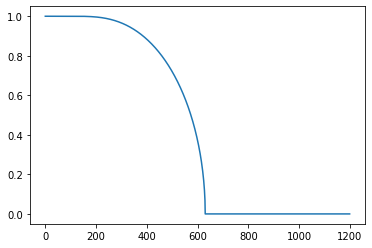

In [173]:
plt.figure()
plt.plot(mf_mag_map)
plt.show()

TypeError: Dimensions of C (1200, 1) should be one smaller than X(60) and Y(1200) while using shading='flat' see help(pcolormesh)

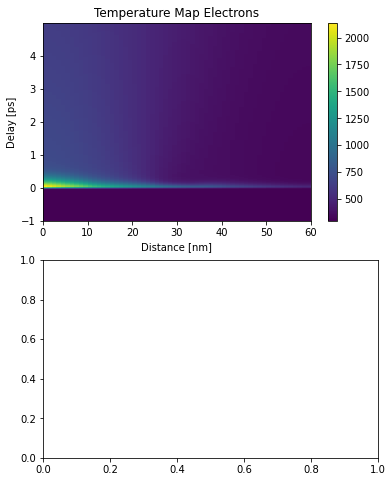

In [166]:
plt.figure(figsize=[6, 8])

plt.subplot(2, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Electrons')

plt.subplot(2, 1, 2)

plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, mf_mag_map, shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('mean-field magnetization')

plt.tight_layout()

plt.show()

In [11]:
layer_Co._magnetization

{'amplitude': 1, 'phi': 0.0, 'gamma': 0.0}

In [17]:
test = np.array([1, 2, 3])*u.deg

In [19]:
isinstance(test,  Q_)

True

Ni
630.0
(2565,)


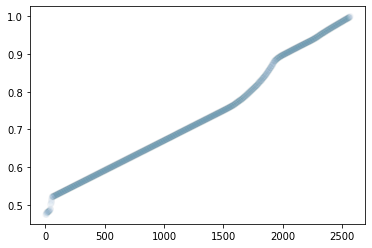

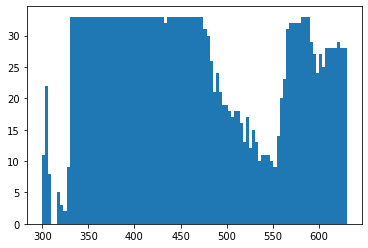

Co
1480.0
(1694,)


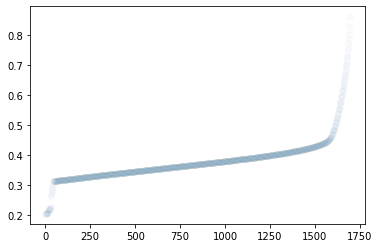

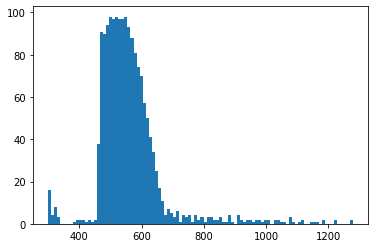

Fe
1024.0
(943,)


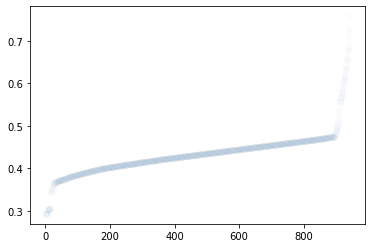

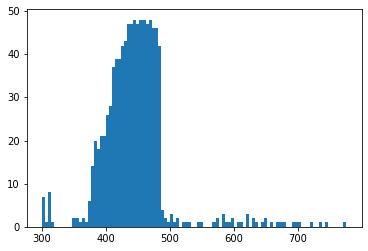

In [80]:
unique_layers = S.get_unique_layers()
for i, (k, v) in enumerate(S.get_all_positions_per_unique_layer().items()):
    print(k)
    print(unique_layers[1][i]._curie_temp)
    T_C = unique_layers[1][i]._curie_temp
    unique_temps = np.unique(np.round(temp_map[:, v, 0].flatten(), decimals=1))
    unique_temps = np.sort(unique_temps[unique_temps < T_C])
    print(unique_temps.shape)
    reduced_temps = unique_temps/T_C
    plt.figure()
    plt.plot(reduced_temps, 'o', alpha=0.01)
    # plt.plot(np.linspace(reduced_temps[0], reduced_temps[-1], 100), '-')
    plt.show()
    plt.figure()
    plt.hist (unique_temps, 100)
    plt.show()

In [124]:
import time

In [245]:
from scipy.optimize import fsolve

t1 = time.time()
(M, N) = temp_map[:, :, 0].shape  # M - number of delays, N - number of layers

mf_mag_map = np.zeros_like(temp_map[:, :, 0])

unique_layers = S.get_unique_layers()
relevant_temps = {}
for i, (k, v) in enumerate(S.get_all_positions_per_unique_layer().items()):
    print(k)
    relevant_temps[k] = []
    print(unique_layers[1][i]._curie_temp)
    
    curie_temp = unique_layers[1][i]._curie_temp
    eff_spin = unique_layers[1][i].eff_spin
    mf_exch_coupling = unique_layers[1][i].mf_exch_coupling    
    
    # use different down-sampling when being closer to T_C
    unique_temps = np.unique(np.round(temp_map[:, v, 0].flatten(), decimals=1))
    # unique_temps = np.unique(np.sort(temp_map[:, v, 0].flatten()))
    unique_temps = unique_temps[unique_temps <= curie_temp]
    reduced_temps = unique_temps/curie_temp
    
    #_, reduced_temps = get_optimized_grid(np.arange(len(_reduced_temps)), _reduced_temps, 100)

    # reduced_temps = np.sqrt(np.linspace(0, 1, 1000))
    
    mf_mags = np.zeros_like(reduced_temps)

    for j, T in enumerate(reduced_temps):
        if T == 1:
            mf_mags[j] = 0
        else:
            mf_mags[j] = fsolve(
                lambda x: x - ud.LLB.calc_Brillouin(x, T, eff_spin, mf_exch_coupling, curie_temp), np.sqrt(1-T))
            
    relevant_temps[k] = np.stack((reduced_temps*curie_temp, mf_mags))
    
    # avoid for loop and use flatten() and reshape() instead
    # for jj in range(M):
    idx = ud.helpers.finderb(np.round(temp_map[:, v, 0].flatten(), decimals=1), relevant_temps[k][0, :])
    mf_mag_map[:, v] = np.reshape(relevant_temps[k][1, idx], (M, len(v)))
        
t2 = time.time()

print(t2-t1)

Ni
630.0
Co
1480.0
Fe
1024.0
4.370907783508301


In [246]:
mf_mag_map

array([[0.96599239, 0.96599239, 0.96599239, ..., 0.96599239, 0.96599239,
        0.96599239],
       [0.96599239, 0.96599239, 0.96599239, ..., 0.96599239, 0.96599239,
        0.96599239],
       [0.96599239, 0.96599239, 0.96599239, ..., 0.96599239, 0.96599239,
        0.96599239],
       ...,
       [0.79319818, 0.79319818, 0.79319818, ..., 0.79319818, 0.79319818,
        0.79319818],
       [0.79319818, 0.79319818, 0.79319818, ..., 0.79319818, 0.79319818,
        0.79319818],
       [0.79319818, 0.79319818, 0.79319818, ..., 0.79319818, 0.79319818,
        0.79319818]])

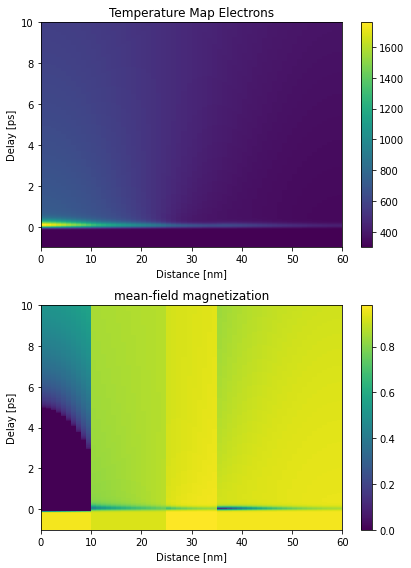

In [251]:
plt.figure(figsize=[6, 8])

plt.subplot(2, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Electrons')


plt.ylim(-1, 10)
plt.subplot(2, 1, 2)

plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, mf_mag_map, shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('mean-field magnetization')


plt.ylim(-1, 10)
plt.tight_layout()

plt.show()

In [248]:
t1 = time.time()

mf_mag_map_full = mag.calc_mean_field_mag_map(temp_map[:, :, 0])

t2 = time.time()

print(t2-t1)

4.37612509727478


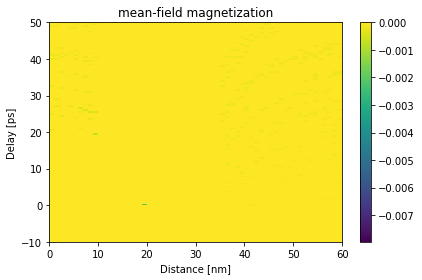

In [249]:

plt.figure(figsize=[6, 4])

plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, (mf_mag_map_full-mf_mag_map), shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('mean-field magnetization')

plt.tight_layout()

plt.xlim(0, 60)

plt.ylim(-10, 50)

plt.show()

array([0.        , 0.1       , 0.14142136, 0.17320508, 0.2       ,
       0.2236068 , 0.24494897, 0.26457513, 0.28284271, 0.3       ,
       0.31622777, 0.33166248, 0.34641016, 0.36055513, 0.37416574,
       0.38729833, 0.4       , 0.41231056, 0.42426407, 0.43588989,
       0.4472136 , 0.45825757, 0.46904158, 0.47958315, 0.48989795,
       0.5       , 0.50990195, 0.51961524, 0.52915026, 0.53851648,
       0.54772256, 0.55677644, 0.56568542, 0.57445626, 0.58309519,
       0.59160798, 0.6       , 0.60827625, 0.6164414 , 0.6244998 ,
       0.63245553, 0.64031242, 0.64807407, 0.65574385, 0.66332496,
       0.67082039, 0.678233  , 0.68556546, 0.69282032, 0.7       ,
       0.70710678, 0.71414284, 0.72111026, 0.72801099, 0.73484692,
       0.74161985, 0.74833148, 0.75498344, 0.76157731, 0.76811457,
       0.77459667, 0.78102497, 0.78740079, 0.79372539, 0.8       ,
       0.80622577, 0.81240384, 0.81853528, 0.82462113, 0.83066239,
       0.83666003, 0.84261498, 0.84852814, 0.85440037, 0.86023

In [84]:
for i in range(N):
    for j in range(M):
        T = temp_map[j, i, 0]/curie_temps[i] # remove last index
        if T > 1:
            mf_mag_map[j, i] = 0
        else:
            mf_mag_map[j, i] = fsolve(
                lambda x: x - ud.LLB.calc_Brillouin(x, T, eff_spins[i],
                                                 mf_exch_couplings[i],
                                                 curie_temps[i]),
                np.sqrt(1-T))

C:\Users\loc_schick\General\Python\WPy64-3890\python-3.8.9.amd64\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


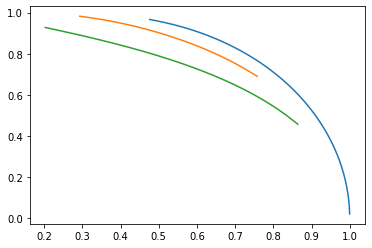

In [97]:
plt.figure()
plt.plot(relevant_temps['Ni'][0, :], relevant_temps['Ni'][1, :])

plt.plot(relevant_temps['Fe'][0, :], relevant_temps['Fe'][1, :])

plt.plot(relevant_temps['Co'][0, :], relevant_temps['Co'][1, :])
plt.show()

In [95]:
relevant_temps['Ni'][0, :]

array([0.47619048, 0.47666667, 0.4768254 , ..., 0.99952381, 0.99968254,
       0.99984127])

In [172]:
def get_optimized_grid(x_fine, y_fine, N):
    """
    Generate an optimized grid by downsampling a fine grid based on the cumulative gradient.

    Parameters:
        x_fine (numpy.ndarray): x-coordinates of the fine grid.
        y_fine (numpy.ndarray): y-coordinates of the fine grid.
        N (int): Number of desired points in the optimized grid.

    Returns:
        x_rough (numpy.ndarray): x-coordinates of the optimized grid.
        y_rough (numpy.ndarray): y-coordinates of the optimized grid.
    """
    cumulative_gradient = np.cumsum(np.abs(np.gradient(y_fine)))
    cumulative_gradient_reduced = np.linspace(0, np.max(cumulative_gradient), N)
    x_rough = np.interp(cumulative_gradient_reduced, cumulative_gradient, x_fine)
    y_rough = np.interp(x_rough, x_fine, y_fine)
    return x_rough, y_rough

In [180]:
y_fine = np.unique(np.sort(temp_map[:, v, 0].flatten()))
x_fine = np.arange(len(y_fine))

In [189]:
x_rough, y_rough = get_optimized_grid(x_fine, y_fine, 200)

In [190]:
len(x_fine)

5641

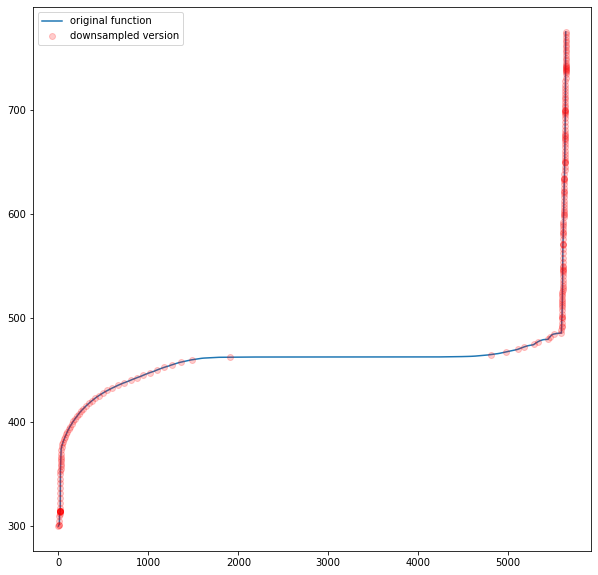

In [191]:
plt.figure(figsize=[10, 10])
plt.plot(x_fine, y_fine, '-', label="original function")
plt.plot(x_rough, y_rough, 'ro',alpha=0.2, label="downsampled version")
plt.legend()
plt.show()

In [132]:
S.get_all_positions_per_unique_layer()

{'Ni': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 35, 36, 37, 38, 39, 40, 41,
        42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
        59], dtype=int64),
 'Co': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       dtype=int64),
 'Fe': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34], dtype=int64)}

In [133]:
S.get_distances_of_interfaces(False)

array([0.0e+00, 1.0e-08, 2.5e-08, 3.5e-08, 6.0e-08])

In [134]:
indices, ids, handles = S.get_layer_vectors()

In [164]:
interafaces = (np.r_[1, np.diff(indices), 1])
interafaces[interafaces != 0] = -1
select = (interafaces+1).astype(np.int16)
print(select)

[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [173]:
exch_stiffnesses = S.get_layer_property_vector('_exch_stiffness')
print(exch_stiffnesses[np.arange(len(select[0:-1])), select[0:-1]])

[1.e-15 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14
 2.e-15 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14
 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 3.e-15 3.e-14 3.e-14 3.e-14 3.e-14
 3.e-14 3.e-14 3.e-14 3.e-14 3.e-14 1.e-15 1.e-14 1.e-14 1.e-14 1.e-14
 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14
 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14]


In [175]:
interafaces[interafaces != 0] = 1
select = (interafaces+1).astype(np.int16)
print(select)
print(exch_stiffnesses[np.arange(len(select[1:])), select[1:]])

[2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
[1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-16
 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14 2.e-14
 2.e-14 2.e-14 2.e-14 2.e-14 2.e-16 3.e-14 3.e-14 3.e-14 3.e-14 3.e-14
 3.e-14 3.e-14 3.e-14 3.e-14 3.e-16 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14
 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14
 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-14 1.e-16]


In [166]:
exch_stiffnesses.shape

(60, 3)

In [170]:
select[0:-1]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int16)